# **Exploratory Data Analysis** 
This is task 1 of Data@ANZ. 

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [1]:
# This project is for Data@ANZ, written by UNO FANG on 9 Jun 2022

# Import packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest

# get the dirs of all files under the sample_data folder
for dirname, _, filenames in os.walk('sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sample_data/README.md
sample_data/anscombe.json
sample_data/ANZ synthesised transaction dataset.xlsx
sample_data/mnist_test.csv
sample_data/california_housing_train.csv
sample_data/california_housing_test.csv
sample_data/mnist_train_small.csv


In [2]:
task01_anz_data_csv_dir = 'sample_data/anz_synthesised_trans_data.csv'
if not os.path.isfile(task01_anz_data_csv_dir):
  # If not exsit the csv file, convert the xlsx file to csv format
  read_file = pd.read_excel (r'sample_data/ANZ synthesised transaction dataset.xlsx')
  read_file.to_csv (task01_anz_data_csv_dir, index = None, header=True)

# read out the csv file as data
data = pd.read_csv(task01_anz_data_csv_dir)
data.shape

(12043, 23)

# **Data Exploration**

In [3]:
# output the preview of data
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [4]:
# output the metada of null values in each attribute
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [5]:
# output the metadata of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

# **Data Cleaning**

Remove unrelated columns

*   Remove irrelevant attributes
*   Check duplicates
*   Cast correct types of values
*   Assign age group labels to each transaction for analysis



In [6]:
# check duplicates
data.duplicated().sum()

0

In [7]:
# age range
print('age_min',min(data.age))
print('age_max',max(data.age))

age_min 18
age_max 78


In [8]:
# drop irrelevant attributes (which have lots of null values)
if hasattr(data, 'bpay_biller_code'):
    data.drop(columns = ['bpay_biller_code', 'long_lat', 'country', 'merchant_long_lat', 'merchant_code'], axis = 1, inplace=True)
# cast extraction as datetime
data['extraction']= pd.to_datetime(data['extraction'])
# establish new attributes indicating specific day and month
data['day'] = data['extraction'].dt.day_name()
data['month'] =data['extraction'].dt.month_name()
# label each transaction to age groups
data['age_group']=pd.cut(data.age,[0,28,38,48,58,68,9999],labels=['<28','28-38','38-48','48-58','58-68','>68'])
# split payment and purchase
col = 'txn_description'
conditions = [ data[col] == ('PAYMENT' or 'PHONE BANK' or  'INTER BANK'), data[col] == ('POS' or 'SALES-POS'), data[col] != ('PAYMENT' or 'PHONE BANK' or  'INTER BANK' or 'POS' or 'SALES-POS')]
choices = [ "payment", 'purchase', 'unknown' ]
data['payment_or_purchase']=np.select(conditions, choices, default=np.nan)
data.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,movement,day,month,age_group,payment_or_purchase
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,Wednesday,August,<28,purchase
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit,Wednesday,August,<28,unknown
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,debit,Wednesday,August,28-38,purchase
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,debit,Wednesday,August,38-48,unknown
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,debit,Wednesday,August,<28,unknown


In [9]:
print('earliset_trasnsaction',min(data['extraction']))
print('latest_transaction',max(data['extraction']))

earliset_trasnsaction 2018-08-01 01:01:15+00:00
latest_transaction 2018-10-31 23:59:44+00:00


In [10]:
# status info
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [11]:
# card present flag info
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [12]:
# txn description info
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [13]:
# customer id info
data['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [14]:
# merchant state info
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [15]:
# movement info
data['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

# **Data Analysis**

In [27]:
# functions of developing charts
def bar_label_value(ax):
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 10
        y = p.get_y() + p.get_height()
        ax.annotate('{:.0f}'.format(p.get_height()), (x, y), size = 12)

def bar_label_percentage(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['movement']))
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

def bar_chart(this_data,x_attr,y_attr,hue_attr,palette,count_flag):
    # Initialize figure and axis
    if count_flag:
        sns.countplot(x = x_attr, hue = hue_attr, data = this_data, palette = palette)
    else:
        sns.barplot(x = x_attr, y = y_attr, hue = hue_attr, data = this_data,
            palette = palette, edgecolor = 'w')
    


def pie_chart(ax,attribute):
    if isinstance(attribute, str):
        this_data = data[attribute]
    else:
        this_data = attribute
    
    total = len(this_data)
    y = list(this_data.value_counts())
    labels = this_data.value_counts().index.tolist()
    if this_data.isnull().sum()>0:
        y.append(this_data.isnull().sum())
        labels.append("null values")

    def my_fmt(x):
        return '{:1.1f}%\n({:.0f})'.format(x, total*x/100)
    
    explode = tuple(0 if item<max(y) else 0.1 for index,item in enumerate(y))
    colors = sns.color_palette('pastel')[0:len(y)]

    ax.pie(y, explode=explode, labels=labels, colors=colors, autopct=my_fmt,
           shadow=True, startangle=90)

    # return ax

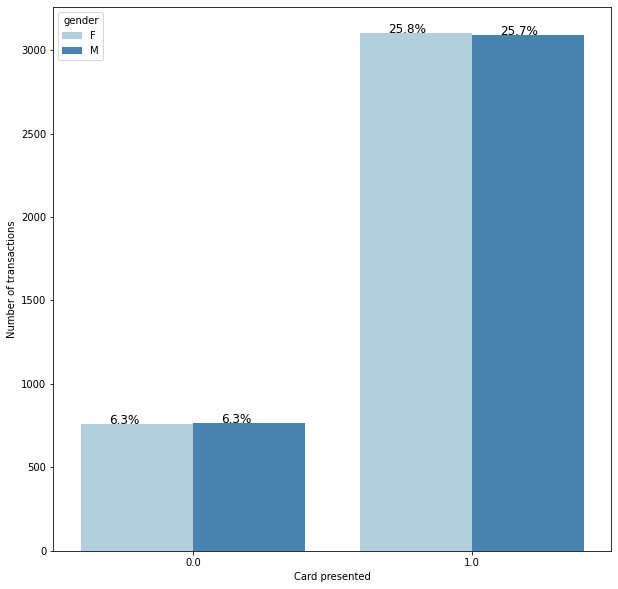

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(data,'card_present_flag',_,'gender','Blues',True)
ax.set_xlabel("Card presented")                         
ax.set_ylabel("Transactions Amount")
bar_label_percentage(ax)

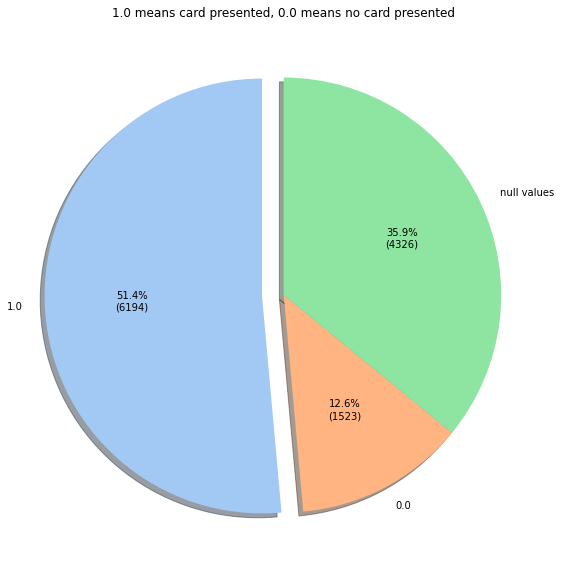

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='card_present_flag'
ax.set_title('1.0 means card presented, 0.0 means no card presented')
pie_chart(ax,attribute)

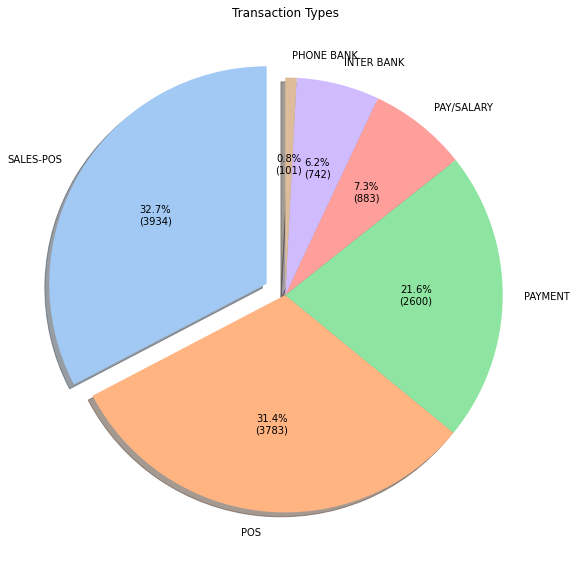

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='txn_description'
ax.set_title("Transaction Types")
pie_chart(ax,attribute)

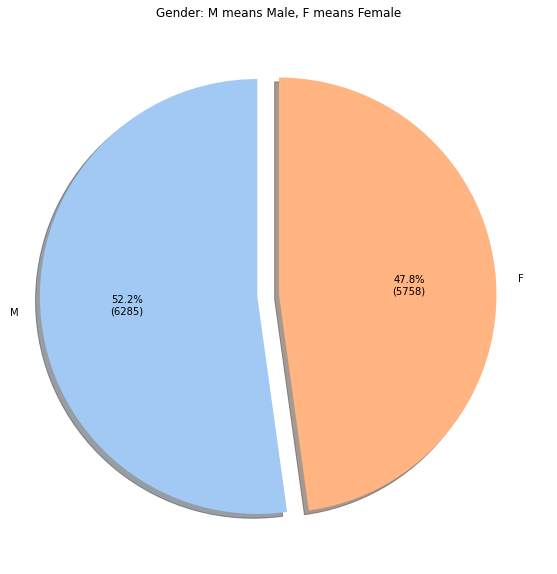

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='gender'
ax.set_title("Gender: M means Male, F means Female")
pie_chart(ax,attribute)

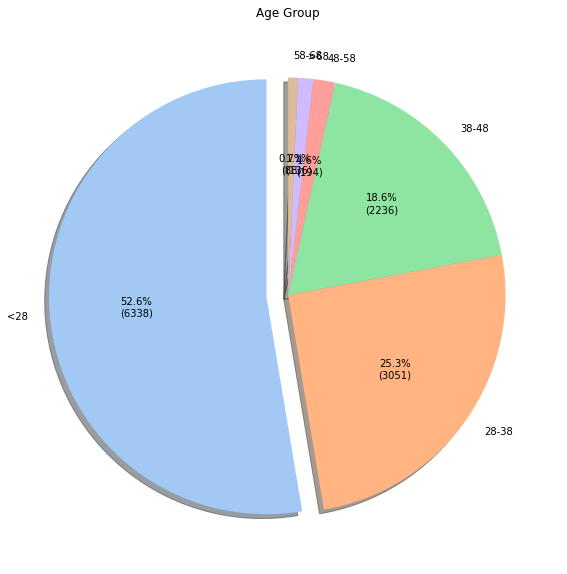

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='age_group'
ax.set_title("Age Group")
pie_chart(ax,attribute)

,age_group,gender,counts
0,<28,F,3114
1,<28,M,3224
2,28-38,F,1161
3,28-38,M,1890
4,38-48,F,1278
5,38-48,M,958
6,48-58,F,117
7,48-58,M,77
8,58-68,F,88
9,58-68,M,0


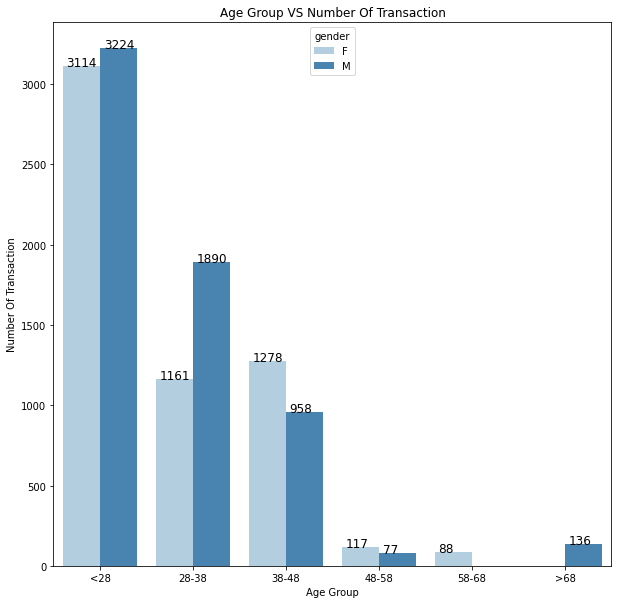

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(data,'age_group',_,'gender','Blues',True)
ax.set_xlabel("Age Group")                         
ax.set_ylabel("Transaction Amount")
plt.title('Age Group VS Transaction Amount')
bar_label_value(ax)

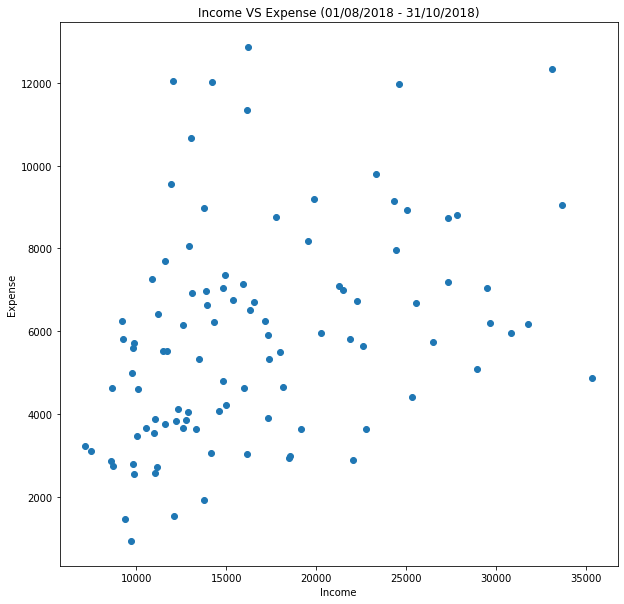

In [23]:
# sum up each customer's debit and credit during three month from 01/08/2018 to 31/10/2018
total_debit = data[data['movement'] == 'debit'].groupby('customer_id')['amount'].sum().to_frame()
total_credit = data[data['movement'] == 'credit'].groupby('customer_id')['amount'].sum().to_frame()
total_credit = total_credit.rename(columns={'amount': 'credit'})
# combine two dataframes as one to plot
total_credit = total_credit.join(total_debit, on='customer_id')

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(total_credit['credit']/3, total_credit['amount']/3)
plt.xlabel('Income')
plt.ylabel('Expense')
plt.title('Income VS Expense (Monthly)')
plt.show()

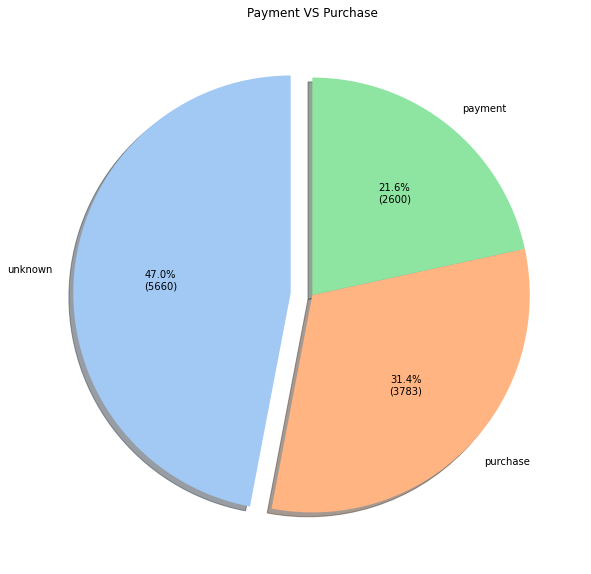

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='payment_or_purchase'
ax.set_title('Payment VS Purchase')
pie_chart(ax,attribute)

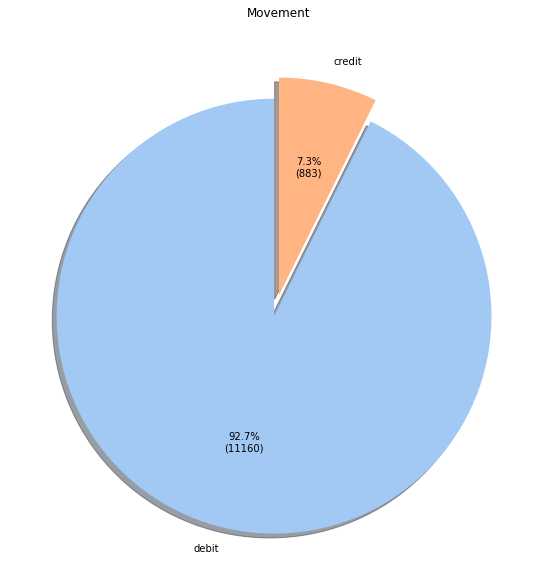

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
attribute ='movement'
ax.set_title('Movement')
pie_chart(ax,attribute)

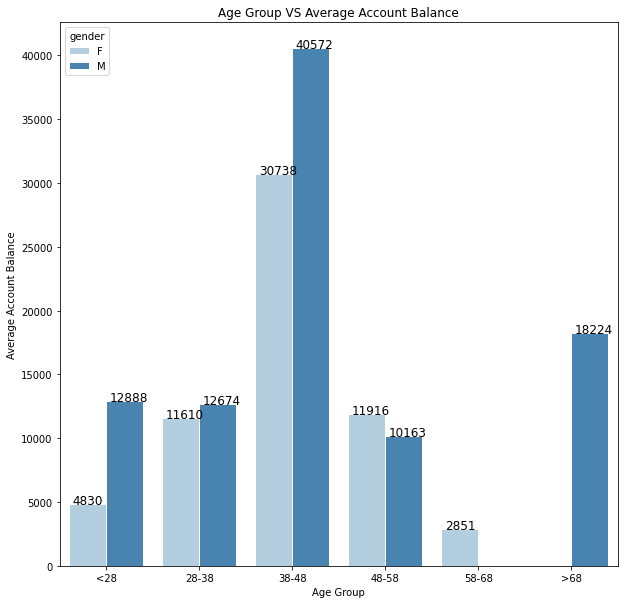

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(data.groupby(['age_group','gender'])["balance"].mean().reset_index(name='mean'),
          'age_group','mean','gender','Blues',False)
ax.set_xlabel("Age Group")                         
ax.set_ylabel("Average Account Balance")
plt.title('Age Group VS Average Account Balance')
bar_label_value(ax)

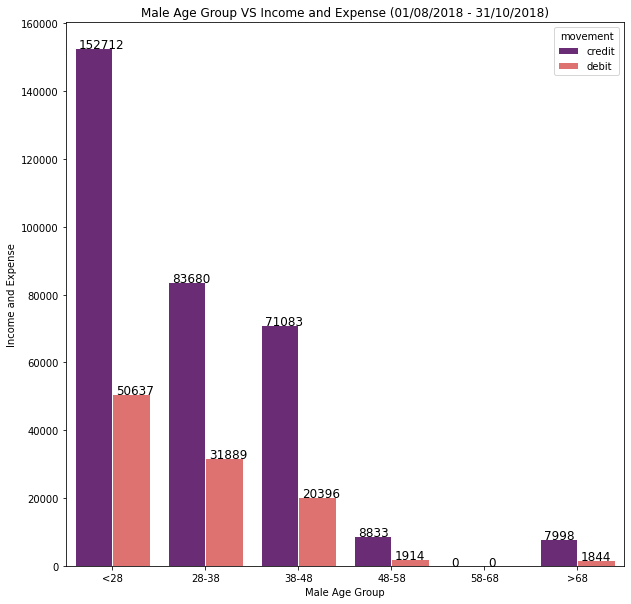

In [107]:
# data.groupby(['movement','age_group','gender'])["amount"].sum().reset_index(name='sum')
i_data = data.groupby(['movement','age_group','gender'])["amount"].sum()/3
i_data = i_data.reset_index(name='sum')
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(i_data[i_data['gender']=='M'],
          'age_group','sum','movement','magma',False)
plt.xlabel('Male Age Group')
plt.ylabel('Income and Expense')
plt.title('Male Age Group VS Income and Expense (Monthly)')
bar_label_value(ax)

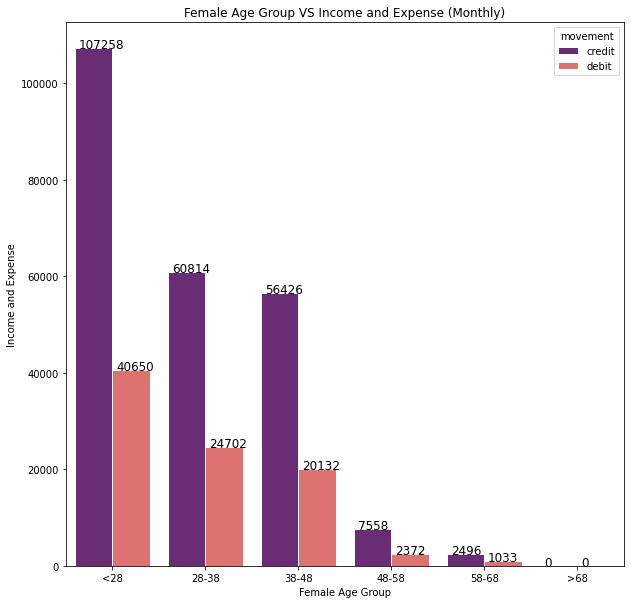

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(i_data[i_data['gender']=='F'],
          'age_group','sum','movement','magma',False)
plt.xlabel('Female Age Group')
plt.ylabel('Income and Expense')
plt.title('Female Age Group VS Income and Expense (Monthly)')
bar_label_value(ax)

In [87]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
i_data = data[data['txn_description'] == ('POS' or 'SALES-POS')].groupby(['day','gender'])['amount'].count().reset_index(name='counts')
i_data['day'] = pd.Categorical(i_data['day'], categories=cats, ordered=True)
i_data = i_data.sort_values('day')

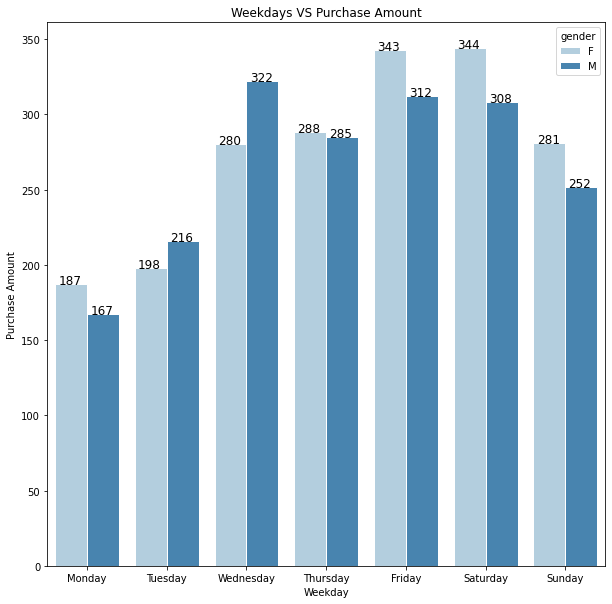

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(i_data,
          'day','counts','gender','Blues',False)
ax.set_xlabel("Weekday")                         
ax.set_ylabel("Purchase Amount")
plt.title('Weekdays VS Purchase Amount')
bar_label_value(ax)

In [94]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
i_data = data[data['txn_description'] == ('PAY/SALARY')].groupby(['day','gender'])['amount'].count().reset_index(name='counts')
i_data['day'] = pd.Categorical(i_data['day'], categories=cats, ordered=True)
i_data = i_data.sort_values('day')
i_data

,day,gender,counts
2,Monday,F,101
3,Monday,M,106
6,Tuesday,F,79
7,Tuesday,M,81
8,Wednesday,F,94
9,Wednesday,M,78
4,Thursday,F,49
5,Thursday,M,94
0,Friday,F,96
1,Friday,M,105


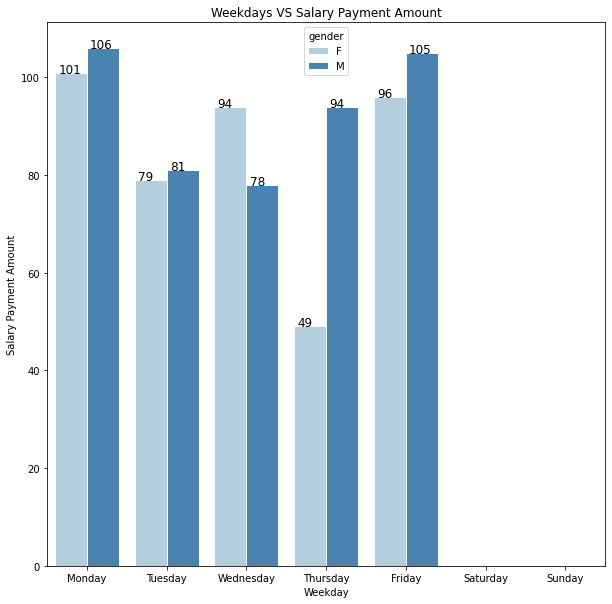

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(i_data,
          'day','counts','gender','Blues',False)
ax.set_xlabel("Weekday")                         
ax.set_ylabel("Salary Payment Amount")
plt.title('Weekdays VS Salary Payment Amount')
bar_label_value(ax)

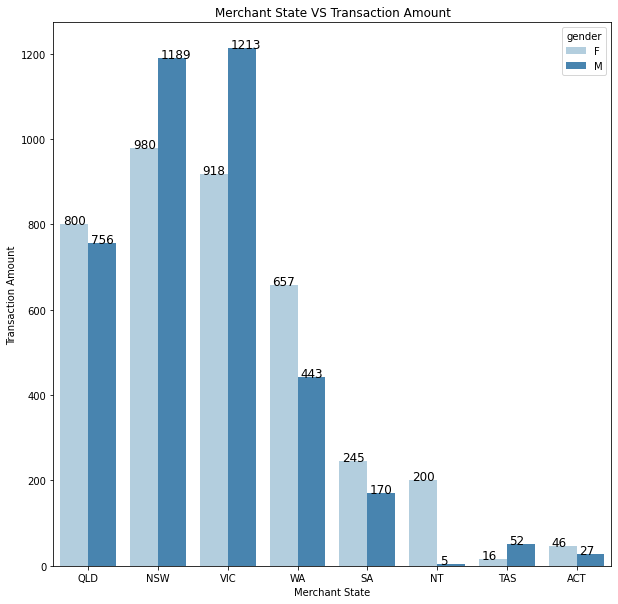

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(data,
          'merchant_state',_,'gender','Blues',True)
ax.set_xlabel('Merchant State')                         
ax.set_ylabel('Transaction Amount')
plt.title('Merchant State VS Transaction Amount')
bar_label_value(ax)

# **Conclusion**

1.   Card-presented transactions are about 40% higher than those made without a card
2.   There are the highest number of transactions via POS
2.   The most of the transactions happen in the age groups of $<$28 and 28-38 
3.   The age group of 38-48 has the highest average account balance
4.   The age groups of $<$28, 28-38 and 38-48  have a significantly higher income and expense  than other age groups
7.   There is a linear relationship between customers’ income and expense with some outliners (i.e., most customers tend to spend more if they earn more, however there are few earn a lot but spend a little and opposite)
8.    More purchases transactions happened on Fridays & Saturdays
9.    More people get paid on either Monday and Friday, however this is not obvious. 


